# Carga de Datos

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving despob_pob_actividad_ocupados_ipc_pib_2023.csv to despob_pob_actividad_ocupados_ipc_pib_2023.csv
User uploaded file "despob_pob_actividad_ocupados_ipc_pib_2023.csv" with length 14593 bytes


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=";")
df.head()

cod_prov          nom_prov  porcen_desp  pob_tot  pob_hom  pob_muj  \
0         1       Araba/Álava           80   336686   165743   170943   
1         2          Albacete           73   387174   193676   193498   
2         3  Alicante/Alacant           44  1950357   963046   987311   
3         4           Almería           62   753920   385180   368740   
4         5             Ávila           94   158407    79551    78856   

   asexos_tactividad  asexos_templeo  asexos_tparo  hombres_tactividad  ...  \
0              58.33           54.36          6.80               64.94  ...   
1              59.00           51.98         11.88               66.18  ...   
2              58.41           50.70         13.22               63.68  ...   
3              61.16           51.44         15.87               67.63  ...   
4              53.84           47.52         11.72               60.37  ...   

   pib_prec  pib_agri  pib_indu  pib_ind_manu  pib_constr  pib_comer  \
0  12939983    201362   3832143       3473573      400677    1946392   
1   8663814    884324   1397006       1018831      465911    1559382   
2  37279735    547312   3627964       2916222     2556047    9851680   
3  15659622   2443690   1348695       1020119      723957    3793774   
4   3300110    141202    324441        251439      266759     645518   

   pib_act_fin  pib_admin  pib_valor_brut  pib_imp_netos  
0      2434844    2891885        11707303        1232680  
1      1440261    2091603         7838487         825327  
2      8929332    8216082        33728417        3551318  
3      2816431    3041318        14167865        1491757  
4       678479     929338         2985737         314373  

[5 rows x 41 columns]

# Exploración

Vamos a explorar con estadística básica nuestro conjunto de datos para ver si podemos sacar alguna conclusión

In [ ]:
import matplotlib.pyplot as plt
plt.rcdefaults()

Un gráfico de dispersión (ScatterPlot) muestra la relación entre dos
variables como puntos en dos  dimensiones, un eje por cada atributo
Las gráficas de dispersión son útiles para detección de relaciones estructuradas
entre variables

In [ ]:
df.drop(['cod_prov'], axis=1, inplace=True)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(25, 25))
#figsize=(25, 25)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Los diagramas de correlación nos indicarán cuan correlacionadas están los atributos predictores con el valor a predecir

In [ ]:
import numpy as np
from scipy.stats.stats import pearsonr
corr = [pearsonr(df['asexos_templeo'], df['porcen_desp'])[0], pearsonr(df['ocupados_industria'], df['porcen_desp'])[0], pearsonr(df['ipc_vivi'], df['porcen_desp'])[0],
        pearsonr(df['pib_valor_brut'], df['porcen_desp'])[0], pearsonr(df['ocupados_servicios'], df['porcen_desp'])[0], pearsonr(df['pib_constr'], df['porcen_desp'])[0],
        pearsonr(df['asexos_tparo'], df['porcen_desp'])[0], pearsonr(df['pib_prec'], df['porcen_desp'])[0]]

features= ('asexos_templeo', 'ocupados_industria', 'ipc_vivi', 'pib_valor_brut', 'ocupados_servicios', 'pib_constr' , 'asexos_tparo', 'pib_prec')
y_pos = np.arange(len(features))

plt.bar(y_pos, corr, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation="vertical")
plt.ylabel('Correlación')
plt.title('Correlacion características vs objetivo')

plt.show()
corr

<ipython-input-18-deec7ef1cb58>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


[0.2421195652467755,
 0.5944990344395872,
 0.5896469962021106,
 -0.2714446544860817,
 -0.6920830390285609,
 -0.32285298221196673,
 -0.5483079805316678,
 -0.27144465336570917]

# Modelado

## Modelo con una sola variable

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=10, random_state=0)

In [ ]:
#Construcción del modelo
regressor.fit(df[['ocupados_industria']], df['porcen_desp'])

DecisionTreeRegressor(max_depth=10, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


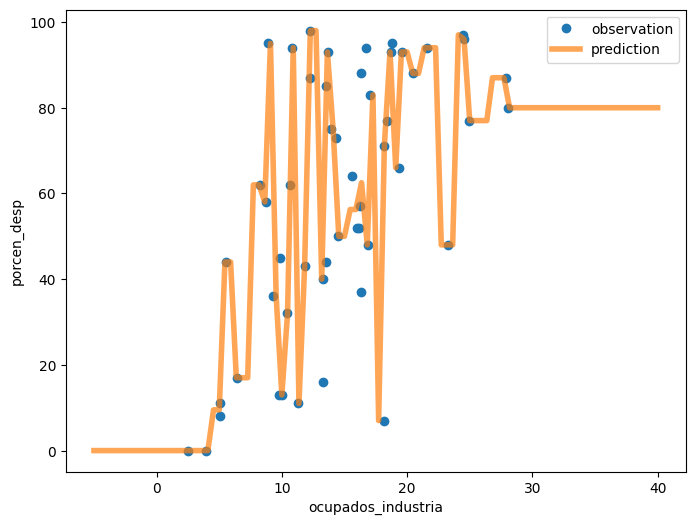

In [ ]:
# Ploteo del modelo
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(df[['ocupados_industria']], df['porcen_desp'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('ocupados_industria')
plt.ylabel('porcen_desp')
plt.legend()
plt.show()

## Modelo con tres variables

Vamos a construir el modelo con las tres variables y vamos a analizar posteriormente la importancia de las características según el árbol de decisión

In [ ]:
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=10, random_state=0)

In [ ]:
regressor.fit(df[['ocupados_industria', 'ipc_vivi', 'ocupados_servicios']], df['porcen_desp'])
features= ('ocupados_industria', 'ipc_vivi', 'ocupados_servicios')
print ('Feature Relevances')
pd.DataFrame({'Attributes': features ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevances


Attributes  Decision Tree
0  ocupados_industria       0.074031
1            ipc_vivi       0.180516
2  ocupados_servicios       0.745453

# Parametrización

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df[['ocupados_industria', 'ipc_vivi', 'ocupados_servicios', 'porcen_desp']], test_size=0.33)
train.reset_index(inplace = True)
test.reset_index(inplace = True)

Primero vamos a probar  si nuestro rendimiento mejora aumentando la profundidad evaluando con el propio conjunto de entrenamiento

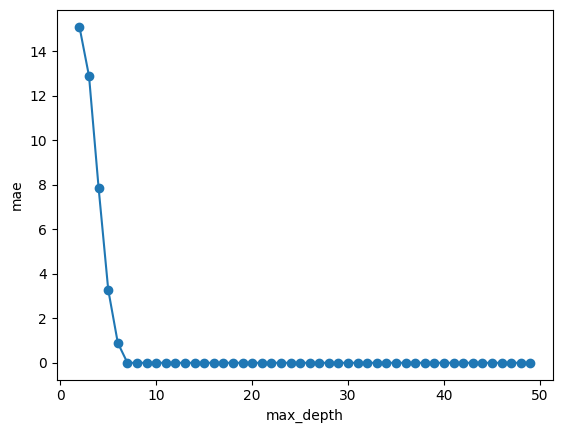

In [ ]:
# Compute the max
mae = []
from sklearn.metrics import mean_absolute_error
for i in range(2, 50):
    regressor = DecisionTreeRegressor(max_depth=i)
    regressor.fit(train[['ocupados_industria', 'ipc_vivi', 'ocupados_servicios']], train['porcen_desp'])
    pred_values = regressor.predict(train[['ocupados_industria', 'ipc_vivi', 'ocupados_servicios']])
    maev = mean_absolute_error(train['porcen_desp'],pred_values)
    mae.append(maev)

# Plot mae
plt.plot(range(2,50), mae, marker='o')
plt.xlabel('max_depth')
plt.ylabel('mae')
plt.show()

Un árbol muy profundo aprenderá con muy poco error el valor del conjunto de entrenamiento. Pero el problema está en el sobreaprendizaje, es decir, aprenderemos muy en detalle las observaciones del conjunto de entrenamiento pero seremos muy poco flexibles ante nuevas circunstancias.

Para evitar este sobreaprendizaje vamos a probar a realizar **evaluación cruzada**, es decir, evaluar las parametrizaciones ante diferentes subconjuntos de entrenamiento y de test.

Min Value 21.87777777777778 (17)


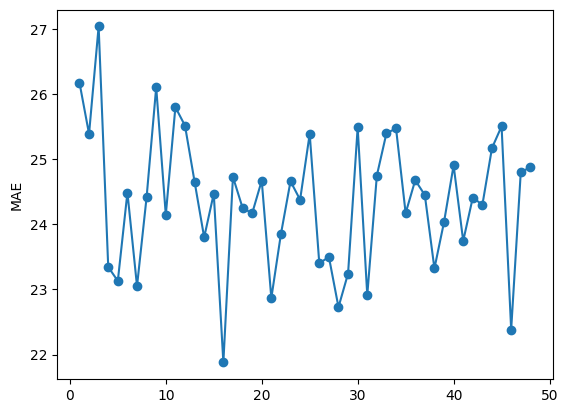

In [ ]:
# CROSS VALIDATION ANALYSIS
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
cv = KFold(n_splits = 6, shuffle = True, random_state=0) #
# reset index
train.reset_index(drop = True, inplace = True)
train.head()

total_scores = []
for i in range(2, 50):
   regressor = DecisionTreeRegressor(max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]
      # entrenamiento y ejecución del modelo
      regressor.fit( X = f_train.drop(['porcen_desp'], axis=1),
                           y = f_train['porcen_desp'])
      y_pred = regressor.predict(X = f_test.drop(['porcen_desp'], axis = 1))
      # evaluación del modelo
      mae = mean_absolute_error(f_test['porcen_desp'], y_pred)
      fold_accuracy.append(mae)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

max_depth = np.argmin(total_scores) + 2
print ('Min Value ' + str(min(total_scores)) +" (" + str(max_depth) + ")")

plt.plot(range(1,len(total_scores)+1), total_scores,
         marker='o')
plt.ylabel('MAE')
plt.show()

In [ ]:
total_scores

[26.178746867167927,
 25.389050224466896,
 27.039374999999996,
 23.344444444444445,
 23.130092592592593,
 24.48888888888889,
 23.05,
 24.416666666666668,
 26.105555555555554,
 24.144444444444446,
 25.8,
 25.516666666666666,
 24.655555555555555,
 23.8,
 24.472222222222225,
 21.87777777777778,
 24.727777777777778,
 24.255555555555556,
 24.166666666666668,
 24.67222222222222,
 22.866666666666664,
 23.849999999999998,
 24.661111111111108,
 24.377777777777776,
 25.388888888888886,
 23.400000000000002,
 23.5,
 22.727777777777774,
 23.244444444444444,
 25.48888888888889,
 22.91111111111111,
 24.75,
 25.400000000000002,
 25.472222222222218,
 24.17222222222222,
 24.67777777777778,
 24.450000000000003,
 23.322222222222223,
 24.03333333333333,
 24.905555555555555,
 23.74444444444444,
 24.41111111111111,
 24.3,
 25.17222222222222,
 25.505555555555556,
 22.383333333333336,
 24.8,
 24.87777777777778]

# Construcción y ejecución del modelo



Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente

In [ ]:
# constructor
regressor = DecisionTreeRegressor(max_depth = max_depth)
# fit and predict

regressor.fit( X = train.drop(['porcen_desp'], axis=1), y = train['porcen_desp'])
y_pred = regressor.predict(X = test.drop(['porcen_desp'], axis = 1))
mae = mean_absolute_error(test['porcen_desp'], y_pred)
print ('MAE', mae)
# round the result and cast to int
import numpy as np
res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame({ 'index': test.index, 'result': res})

MAE 12.666666666666666


Y guardamos el fichero de resultados en nuestro disco.

In [ ]:
from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)

files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Por último probamos visualizamos como ha quedado nuestra predicción con la realidad.

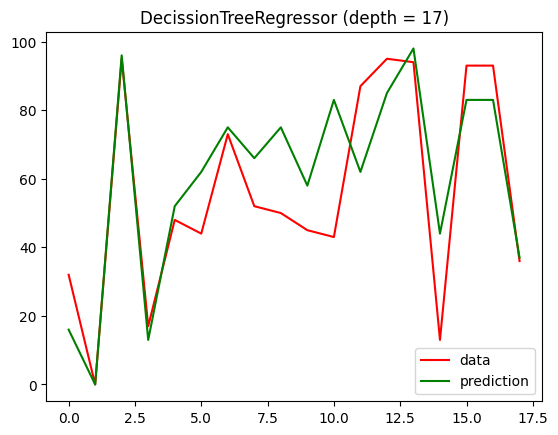

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
xx = np.stack(list(i for i in range(test['porcen_desp'].shape[0])))
plt.plot(xx, test['porcen_desp'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecissionTreeRegressor (depth = %i)" % max_depth)

plt.show()